In [ ]:
pip install yfinance

In [7]:
import yfinance as yf

In [8]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [9]:
# Checking the google stock

stock = "GOOG"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [10]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512
2004-08-26,2.613952,2.688672,2.606729,2.687676,2.684621,142572401
2004-08-27,2.692408,2.705360,2.632383,2.643840,2.640835,124826132
2004-08-30,2.622171,2.627402,2.540727,2.540727,2.537839,104429967


In [11]:
google_data.shape

(5035, 6)

In [12]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5.035000e+03
mean,45.706813,46.190638,45.251702,45.730493,45.680622,1.151321e+08
std,43.853822,44.342846,43.428408,43.893153,43.849564,1.491568e+08
min,2.470490,2.534002,2.464263,2.490913,2.488082,1.584340e+05
25%,13.061791,13.160297,12.910981,13.073871,13.059011,2.722828e+07
50%,27.075665,27.286085,26.863747,27.067686,27.036919,5.487291e+07
75%,60.479500,61.230000,60.160126,60.734501,60.665466,1.418156e+08
max,191.750000,193.309998,190.619995,192.660004,192.660004,1.650833e+09


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

### Understanding the stock prices better with graphs

Text(0.5, 1.0, 'Closing price of Google Data')

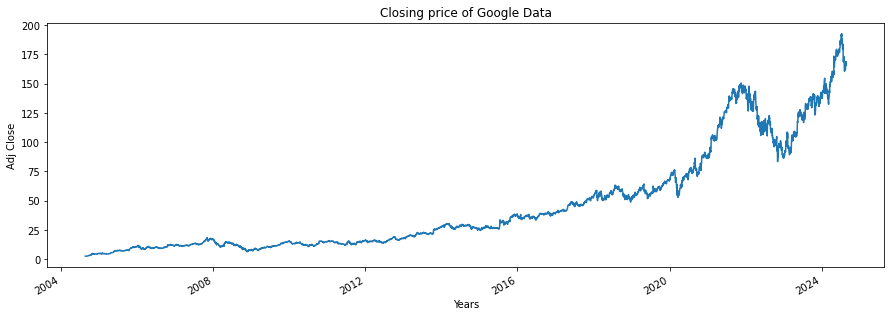

In [14]:

plt.figure(figsize=(15, 5))
google_data['Adj Close'].plot()
plt.xlabel("Years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google Data")

In [15]:
# Creating a function to plot graphs
def plot_graph(figsize, data, col):
    plt.figure()
    data.plot(figsize=figsize)
    plt.xlabel("Years")
    plt.ylabel(col)
    plt.title(f"{col} of Google Data")
 

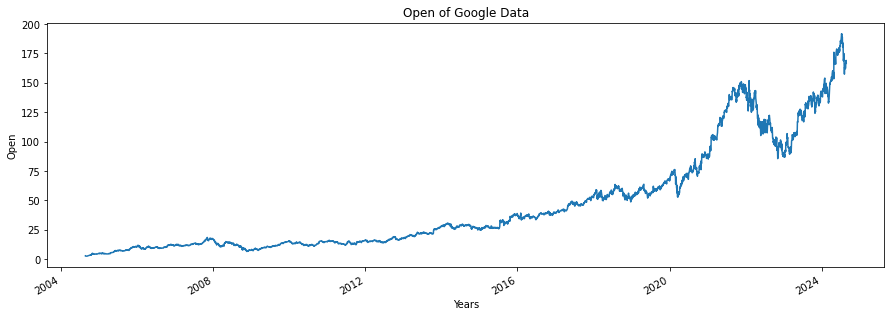

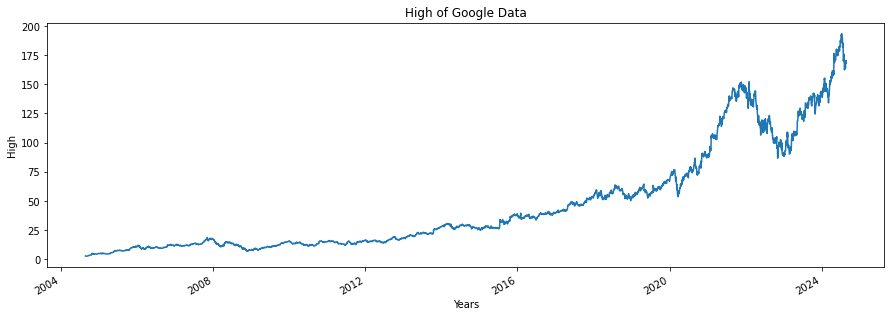

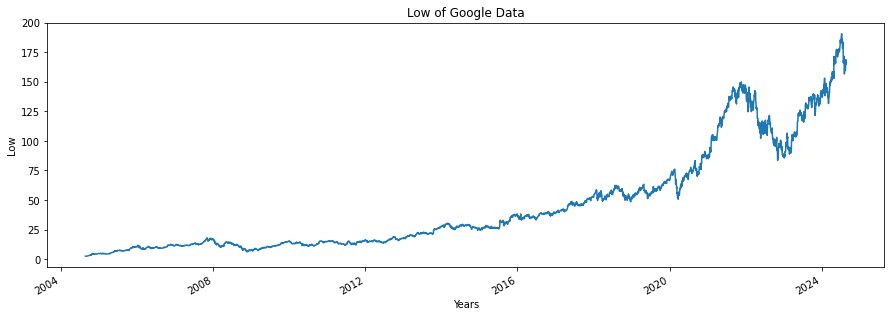

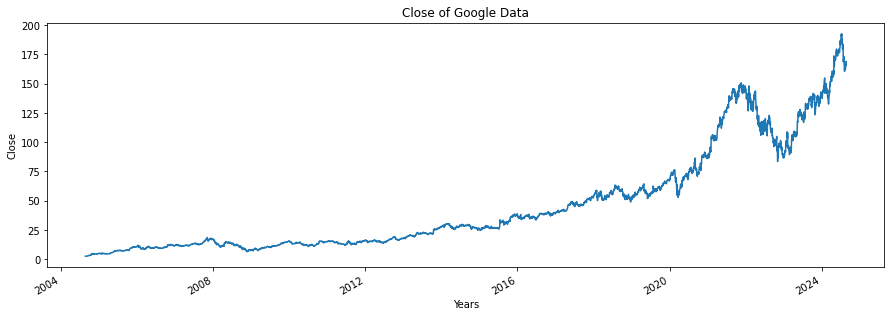

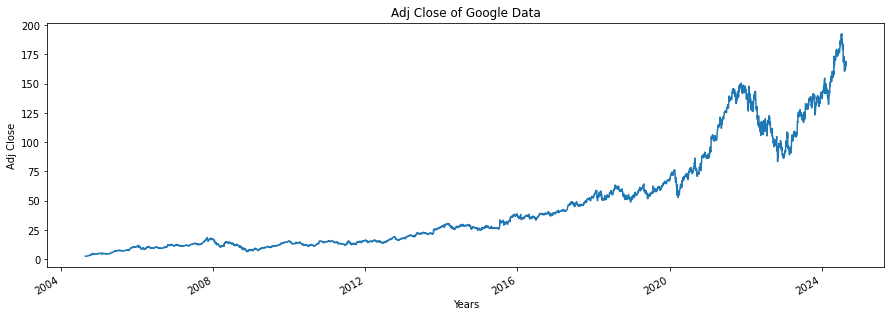

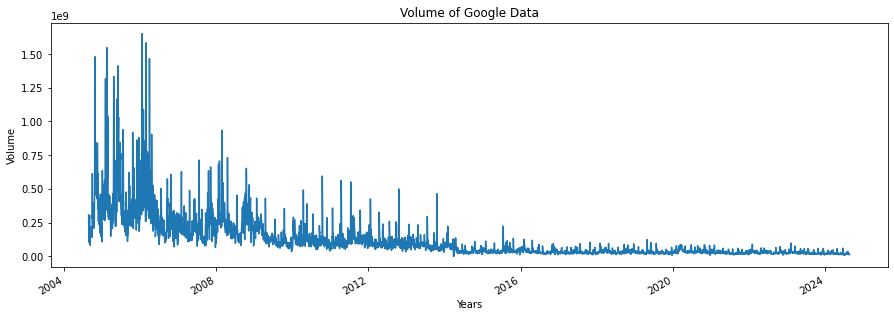

In [16]:
for col in google_data.columns:
    plot_graph((15, 5), google_data[col], col)

In [17]:
import pandas as pd

In [18]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(250).mean()  # MA means moving average

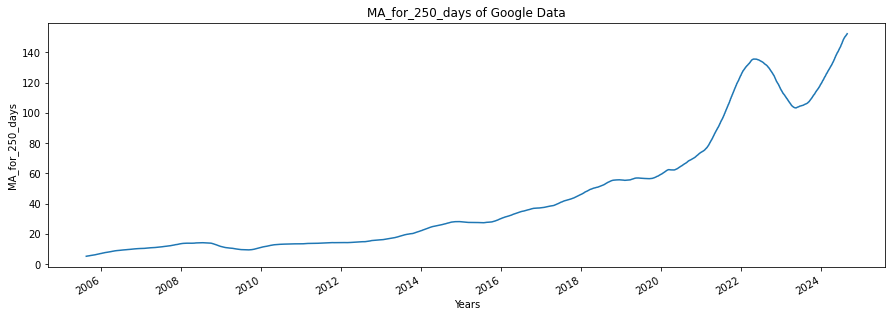

In [19]:
# Plotting the graph for Moving Average for 250 days
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 432x288 with 0 Axes>

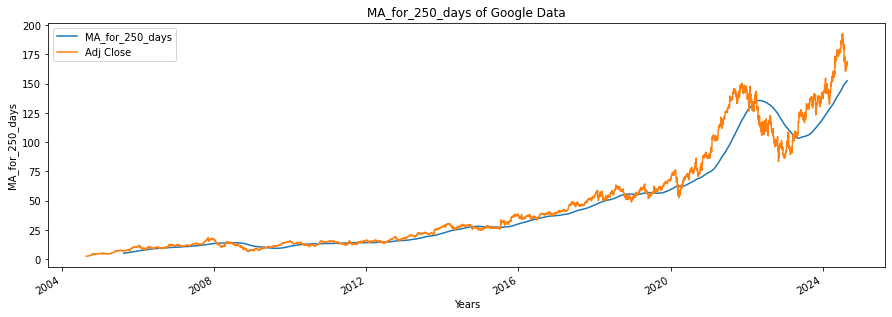

In [20]:
# Moving Average & Adjusted Close Price for 250 days
plot_graph((15,5), google_data[['MA_for_250_days', 'Adj Close']], 'MA_for_250_days')

### Data Preprocessing

In [21]:
Adj_close_price = google_data[['Adj Close']]

In [22]:
# Converting the data in the range (0, 1)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[6.35788989e-04],
       [7.83614035e-04],
       [1.03348276e-03],
       ...,
       [8.68382259e-01],
       [8.57129287e-01],
       [8.67330515e-01]])

In [23]:
import numpy as np

In [24]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
# Converting X an Y data into numpy arrays
x_data, y_data = np.array(x_data), np.array(y_data)

In [25]:
# Splitting the data into training and testing data
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [26]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3454, 100, 1)
(3454, 1)
(1481, 100, 1)
(1481, 1)


### Building the  Neural Network Model

In [42]:
pip install tensorflow

  Using cached tensorflow-2.17.0-cp39-cp39-win_amd64.whl (2.0 kB)
  Using cached tensorflow_intel-2.17.0-cp39-cp39-win_amd64.whl (385.0 MB)
  Using cached ml_dtypes-0.4.0-cp39-cp39-win_amd64.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl (26.4 MB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
  Using cached tensorboard-2.17.1-py3-none-any.whl (5.5 MB)
  Using cached protobuf-4.25.4-cp39-cp39-win_amd64.whl (413 kB)
  Using cached keras-3.5.0-py3-none-any.whl (1.1 MB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl (26 kB)
  Using cached h5py-3.11.0-cp39-cp39-win_amd64.whl (3.0 MB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached grpcio-1.66.0-cp39-cp39-win_amd64.whl (4.3 MB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB

In [44]:
pip install optree

Note: you may need to restart the kernel to use updated packages.


In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [27]:
# Adding the layers

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\hp\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
# Fitting the training data to our model
model.fit(x_train, y_train, batch_size=1, epochs=2)

Epoch 1/2
3454/3454 ━━━━━━━━━━━━━━━━━━━━ 69s 19ms/step - loss: 1.6180e-04
Epoch 2/2
3454/3454 ━━━━━━━━━━━━━━━━━━━━ 71s 20ms/step - loss: 4.7374e-05


In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

### Predicting the test data with our model 

In [33]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [34]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 60.82462 ],
       [ 59.914948],
       [ 59.016552],
       ...,
       [170.42625 ],
       [170.0696  ],
       [168.12929 ]], dtype=float32)

In [35]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 58.34310913],
       [ 57.80172348],
       [ 57.3832016 ],
       ...,
       [167.63000488],
       [165.49000549],
       [167.42999268]])

In [36]:
# Root mean squared value
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test)**2))

In [37]:
plotting_data = pd.DataFrame(
    {
       'original_test_data': inv_y_test.reshape(-1),
        'predictions': inv_predictions.reshape(-1)
    },
    index = google_data.index[splitting_len+100:]
)
plotting_data.head()

,original_test_data,predictions
Date,,
2018-10-04,58.343109,60.824619
2018-10-05,57.801723,59.914948
2018-10-08,57.383202,59.016552
2018-10-09,56.876278,58.423904
2018-10-10,53.999554,58.001530


<Figure size 432x288 with 0 Axes>

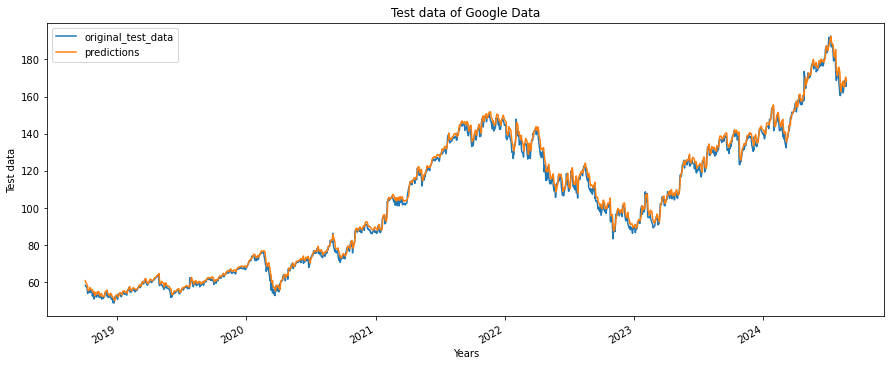

In [40]:
# Visualizing test_data vs predicted_data
plot_graph((15, 6), plotting_data, 'Test data')

<Figure size 432x288 with 0 Axes>

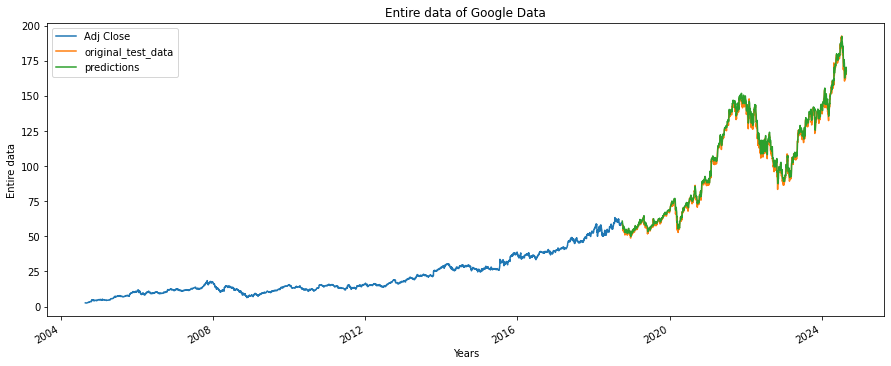

In [41]:
# Plotting the graph with whole data
plot_graph((15, 6), pd.concat([Adj_close_price[:splitting_len+100], plotting_data]), 'Entire data')

In [43]:
model.save('Latest_stock_price_model.keras')